# Experimento 1:
## Estimar cantidad de baños en función de habitaciones y metros cubiertos
Para ejecutar este notebook es necesario haber compilado el código previamente. Esto se puede hacer fácilmente ejecutando la primera celda del notebook Análisis Preliminar

## Cargamos el dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carguemos el dataset al igual que en el notebook anterior
df_train = pd.read_csv("../data/train.csv")

In [2]:
# Importo las funciones necesarias desde otro archivo nuestro
from extra_scripts import cross_validate, rmse, rmsle

In [3]:
df_train.dropna(subset=['habitaciones','banos','metroscubiertos','antiguedad'],inplace=True)
df_train.shape

(171827, 23)

In [4]:
# Tomamos todo el dataset resultante como máximo, es decir 171827 anuncios
limite = df_train.shape[0]

# Randomizamos los valores y nos quedamos con un 80% del dataset para training
cant_train = int((limite / 100) * 80)
shuffle = df_train.sample(random_state=np.random.seed(1), frac=1)
new_train = shuffle.iloc[:cant_train, :]
x_train = new_train[["metroscubiertos"]].values
y_train = new_train["banos"].values

print(f"train_size: {x_train.shape} \n")
# Realizamos Cross Validation con K = 10
results_0 = cross_validate(10, x_train, y_train, True, True)

train_size: (137461, 1) 

RMSE = (0.8076134890411371, 0.005978859546432582)
RMSLE = (0.26632097719370157, 0.001441596771375816)
R2 = (0.18942404584977685, 0.016437412625546082)


In [5]:
limite = df_train.shape[0]

# Randomizo los valores y me quedo con un 80% del dataset para training
cant_train = int((limite / 100) * 80)
shuffle = df_train.sample(random_state=np.random.seed(1), frac=1)
new_train = shuffle.iloc[:cant_train, :]
x_train = new_train[["metroscubiertos", "habitaciones"]].values
y_train = new_train["banos"].values

print(f"train_size: {x_train.shape}\n")
results_1 = cross_validate(10, x_train, y_train, True, True)

train_size: (137461, 2)

RMSE = (0.6492682205417172, 0.003494940163630401)
RMSLE = (0.2046642725772871, 0.0010411125994698603)
R2 = (0.4761858069633814, 0.005115435308111951)


In [6]:
limite = df_train.shape[0]

# Randomizo los valores y me quedo con un 80% del dataset para training
cant_train = int((limite / 100) * 80)
shuffle = df_train.sample(random_state=np.random.seed(1), frac=1)
new_train = shuffle.iloc[:cant_train, :]
x_train = new_train[["metroscubiertos", "antiguedad"]].values
y_train = new_train["banos"].values

print(f"train_size: {x_train.shape} \n")
results_2 = cross_validate(10, x_train, y_train, True, True)

train_size: (137461, 2) 

RMSE = (0.805585537981336, 0.005963935388011391)
RMSLE = (0.26385716954164395, 0.0014540477320775685)
R2 = (0.19349181371868132, 0.016250438172952908)


In [7]:
limite = df_train.shape[0]

# Randomizo los valores y me quedo con un 80% del dataset para training
cant_train = int((limite / 100) * 80)
shuffle = df_train.sample(random_state=np.random.seed(1), frac=1)
new_train = shuffle.iloc[:cant_train, :]
x_train = new_train[["metroscubiertos", "escuelascercanas"]].values
y_train = new_train["banos"].values

print(f"train_size: {x_train.shape} \n")
results_3 = cross_validate(10, x_train, y_train, True, True)

train_size: (137461, 2) 

RMSE = (0.7738505241641701, 0.006223013955959826)
RMSLE = (0.25229461135694026, 0.0016919634804811532)
R2 = (0.2557858317441113, 0.015234591837684715)


### Graficamos el error

In [8]:
def df_format(results, error_type, feature):
    "Funcion para formatear los dataframes"
    df_temp = pd.DataFrame(results[error_type])
    df_temp.columns = ["value"] 
    df_temp["feature_adicional"] = [feature]*df_temp.shape[0]
    return df_temp


# RMSLE
df_results_0 = df_format(results_0,"RMSLE", "sin_adicional") 
df_results_1 = df_format(results_1,"RMSLE", "habitaciones") 
df_results_2 = df_format(results_2,"RMSLE", "antiguedad") 
df_results_3 = df_format(results_3,"RMSLE", "escuelascercanas") 

df_results_rmsle = pd.concat([df_results_0, df_results_1, df_results_2, df_results_3])
df_results_rmsle["metrica"] = ["RMSLE"]*df_results_rmsle.shape[0]

# RMSE

df_results_0 = df_format(results_0,"RMSE", "sin_adicional") 
df_results_1 = df_format(results_1,"RMSE", "habitaciones") 
df_results_2 = df_format(results_2,"RMSE", "antiguedad") 
df_results_3 = df_format(results_3,"RMSE", "escuelascercanas") 

df_results_rmse = pd.concat([df_results_0, df_results_1, df_results_2, df_results_3])
df_results_rmse["metrica"] = ["RMSE"]*df_results_rmse.shape[0]

# R2
df_results_0 = df_format(results_0,"R2", "sin_adicional") 
df_results_1 = df_format(results_1,"R2", "habitaciones") 
df_results_2 = df_format(results_2,"R2", "antiguedad") 
df_results_3 = df_format(results_3,"R2", "escuelascercanas") 

df_results_r2 = pd.concat([df_results_0, df_results_1, df_results_2, df_results_3])
df_results_r2["metrica"] = ["R2"]*df_results_r2.shape[0]

# display(df_results_rmsle)
# display(df_results_rmse)
# display(df_results_r2)

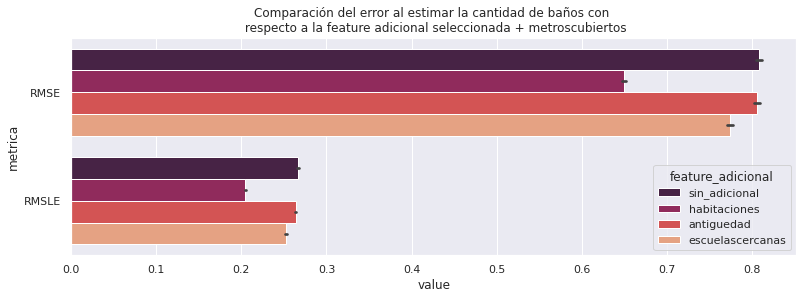

In [9]:
sns.set()
plt.figure(figsize=(13, 4))
#Graficamos
sns.barplot(data=pd.concat([df_results_rmse, df_results_rmsle]), y='metrica', x="value", hue="feature_adicional", palette="rocket")
plt.title("Comparación del error al estimar la cantidad de baños con \n respecto a la feature adicional seleccionada + metroscubiertos")

plt.savefig("Exp1/Comp-de-error-para-las-features-seleccionadas.png", bbox_inches = "tight")

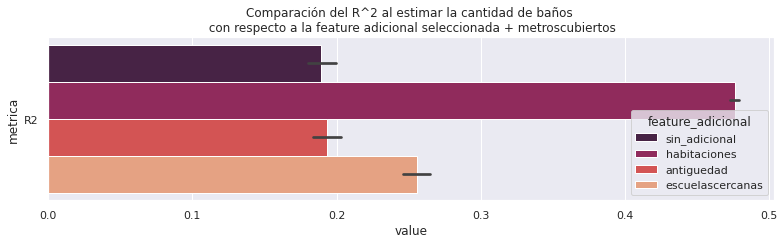

In [10]:
sns.set()
plt.figure(figsize=(13, 3))

sns.barplot(data=pd.concat([df_results_r2]), y='metrica', x="value", hue="feature_adicional", palette="rocket")
plt.title("Comparación del R^2 al estimar la cantidad de baños \n con respecto a la feature adicional seleccionada + metroscubiertos")

plt.savefig("Exp1/Comp-de-r2-para-las-features-seleccionadas.png", bbox_inches = "tight")


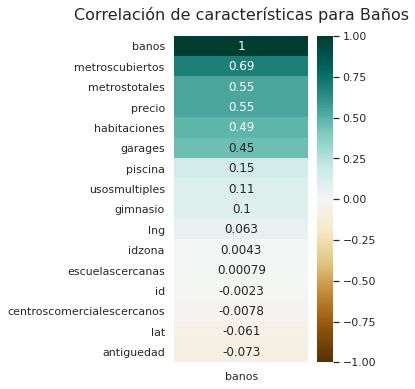

In [11]:
plt.figure(figsize=(3, 6))
heatmap = sns.heatmap(df_train.corr()[['banos']].sort_values(by='banos', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de características para Baños', fontdict={'fontsize':16}, pad=16)

plt.savefig("Exp1/Correlacion-de-caracteristicas-para-Banos.png", bbox_inches = "tight")